In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from io import StringIO
import graphviz
import numpy as np

In [2]:
data = pd.read_csv('../data/b/data.csv')

In [55]:
level = 6 # max 6

In [65]:
data.tail()

,RTG,Radius,os trapeziodeum (2),os trapezium (1),Distal phalang of fifth finger,Visible carpal bones,os lunatum (6),group
24,14_0_b,8,6,7,7,7,6,12
25,15_0_b,8,6,7,8,7,7,12
26,16_0_b,8,7,8,8,7,7,13
27,17_0_b,9,8,8,9,7,8,13
28,18_0_b,9,9,9,9,7,9,13


In [57]:
X = data.values[:, 1:level+1].astype('float64')  # Vezmeme imformace o kostech a pregenerujeme na floaty

In [58]:
X

array([[ 1.,  1.,  1.,  1.,  2.,  1.],
       [ 1.,  1.,  1.,  1.,  2.,  1.],
       [ 1.,  1.,  1.,  1.,  2.,  1.],
       [ 1.,  1.,  1.,  1.,  2.,  1.],
       [ 2.,  1.,  1.,  1.,  2.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  1.],
       [ 4.,  1.,  1.,  1.,  3.,  1.],
       [ 5.,  1.,  1.,  1.,  3.,  1.],
       [ 5.,  1.,  1.,  2.,  4.,  2.],
       [ 6.,  1.,  1.,  3.,  4.,  2.],
       [ 6.,  1.,  1.,  4.,  4.,  3.],
       [ 6.,  1.,  2.,  4.,  5.,  3.],
       [ 6.,  2.,  3.,  5.,  5.,  3.],
       [ 6.,  3.,  3.,  5.,  6.,  3.],
       [ 7.,  3.,  3.,  6.,  7.,  4.],
       [ 7.,  3.,  4.,  6.,  7.,  5.],
       [ 7.,  3.,  4.,  7.,  7.,  5.],
       [ 7.,  4.,  4.,  7.,  7.,  5.],
       [ 7.,  4.,  4.,  7.,  7.,  5.],
       [ 7.,  5.,  5.,  7.,  7.,  6.],
       [ 7.,  5.,  5.,  7.,  7.,  6.],
       [ 8.,  6.,  6.,  7.,  7.,  6.],
       [ 8.,  6.,  7.,  7.,  7.,  6.],
       [ 8.,  6.,  7.,  8

In [59]:
Y = data.values[:, -1].astype('float64')  # Totez pro informace o vysledne skupine

In [60]:
Y

array([  1.,   1.,   1.,   1.,   2.,   2.,   2.,   2.,   3.,   3.,   4.,
         4.,   5.,   6.,   6.,   7.,   8.,   9.,  10.,  10.,  10.,  11.,
        11.,  12.,  12.,  12.,  13.,  13.,  13.])

In [61]:
clf = DecisionTreeClassifier(min_samples_split=5)
dt = clf.fit(X, Y)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
out = StringIO()
export_graphviz(clf, out_file=out, feature_names=data.columns[1:level+1])

In [63]:
g = graphviz.Source(out.getvalue())

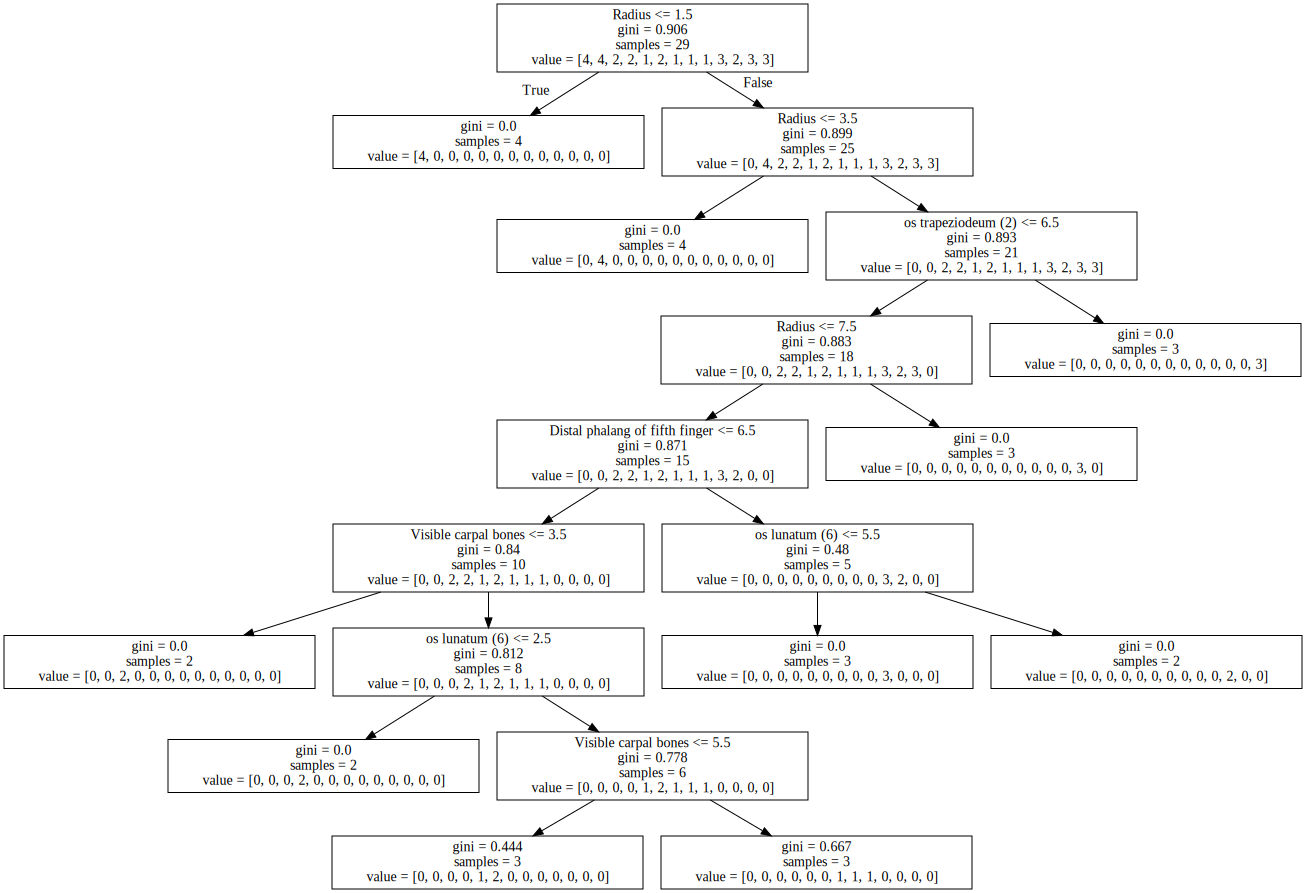

In [64]:
g

In [13]:
dt.predict(np.array([0, 0, 0, 0, 0, 0]).reshape(1, -1))

array([ 1.])